In [29]:
import pandas as pd
import seaborn
import numpy as np

import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/maximyam/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
data = pd.read_csv("stock_data.csv")
data.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


[Text(0, 0, '3685'), Text(0, 0, '2106')]

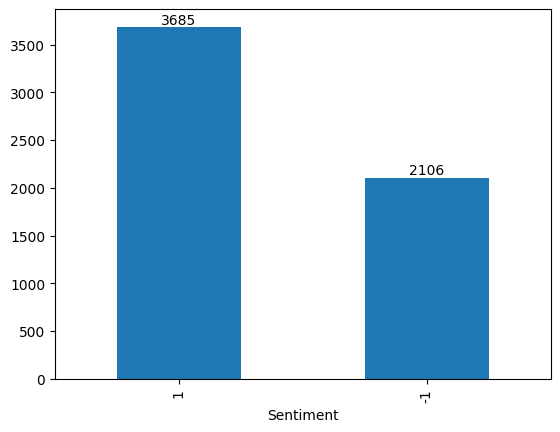

In [18]:
# data.value_counts(data["Sentiment"])
ax = data.value_counts(data["Sentiment"]).plot.bar()
ax.bar_label(ax.containers[0])
#Mainly positive sentiments 

In [43]:
vader = SentimentIntensityAnalyzer()
vader
scores = data['Text'].apply(vader.polarity_scores).tolist()
scores_df = pd.DataFrame(scores)
data = data.join(scores_df, rsuffix='_right')
data = pd.DataFrame(data)


In [49]:
data = pd.DataFrame(data)
print(data['pos'].astype(float))
print(data['neg'].astype(float))
data["predict"][data['neg'] <= data['pos']] = -1
data["predict"][data['neg'] > data['pos']] = 1


data['xksdlf;la'] = np.where((data['neg'] <= data['neg'], 1  | 2 ))

0       0.000
1       0.244
2       0.143
3       0.000
4       0.000
        ...  
5786    0.000
5787    0.155
5788    0.083
5789    0.000
5790    0.000
Name: pos, Length: 5791, dtype: float64
0       0.000
1       0.000
2       0.000
3       0.000
4       0.000
        ...  
5786    0.266
5787    0.150
5788    0.083
5789    0.000
5790    0.000
Name: neg, Length: 5791, dtype: float64


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().